implements the voter model on an input network


In [17]:
import csv
import networkx as nx
import random

def float01(x):
    x = float(x)
    assert 0 <= x <= 1, 'expected float in [0, 1]'

    return x

def parse_args():
    parser = argparse.ArgumentParser(description='voter model')
    parser.add_argument('network',
                        help='input undirected network, expected as csv where the first '+
                        'two element of each row symbolize the endpoints of an edge')

    parser.add_argument('-b','--blue',dest='blue',
                        help='percentage of a "blue" nodes as a float in [0,1], percentage red == 1-blue',
                        default=0.5,
                        type=float01)
    
    parser.add_argument('-T',dest='max_time',
                        help='maximum timestep',
                        type=int,
                        default=1000)

    return parser

def read_edgelist(filename,**kwargs):
    """
    reads an edgelist, returns an undirected network
    """
    G = nx.Graph()
    with open(filename,'r') as csvfile:
        reader = csv.reader(csvfile, **kwargs)
        for row in reader:
            src, targ = row[:2]
            if src.lower() == 'source' and targ.lower() == 'target':
                continue
            G.add_edge(src,targ)
    return G

def voter_model(network, T=1000):
    network = sorted(nx.connected_component_subgraphs(network), key=len, reverse=True)[0]
    T = range(T)
    blue_share = []
    for t in T:
        shadow = network.copy()
        for u in shadow:
            neighbors = shadow.neighbors(u)
            colors = [network.node[n]['color'] for n in neighbors]
            adopted = random.choice(colors)
            network.node[u]['color'] = adopted
        colors = list(nx.get_node_attributes(network, 'color').values())
        blue = list(filter(lambda c: c == 'blue', colors))
        blue_share.append(len(blue)/len(colors))
    return blue_share

In [18]:
#args = parse_args().parse_args()
net  = read_edgelist('nets/quakers_edgelist.csv')
pblue = 0.75
nodes        = net.nodes()
number_blue  = int(round(pblue * len(nodes)))
blue_nodes   = set(random.sample(nodes, k=number_blue))
node_attrs = dict()
for u in nodes:
    if u in blue_nodes:
        node_attrs[u] = 'blue'
    else:
        node_attrs[u] = 'red'
nx.set_node_attributes(net,name='color',values=node_attrs)
voter_model(net)

[0.6458333333333334,
 0.6041666666666666,
 0.6666666666666666,
 0.65625,
 0.4270833333333333,
 0.4166666666666667,
 0.4375,
 0.34375,
 0.3020833333333333,
 0.2916666666666667,
 0.21875,
 0.28125,
 0.21875,
 0.34375,
 0.3020833333333333,
 0.22916666666666666,
 0.15625,
 0.10416666666666667,
 0.3020833333333333,
 0.5104166666666666,
 0.5729166666666666,
 0.59375,
 0.6041666666666666,
 0.6041666666666666,
 0.6979166666666666,
 0.8541666666666666,
 0.8645833333333334,
 0.8854166666666666,
 0.9166666666666666,
 0.8958333333333334,
 0.875,
 0.9479166666666666,
 0.9791666666666666,
 0.9791666666666666,
 0.9375,
 0.9166666666666666,
 0.9479166666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [6]:
nx.get_node_attributes(net, 'color')

{'Alexander Parker': 'red',
 'Alexander Skene of Newtyle': 'blue',
 'Alice Curwen': 'blue',
 'Anne Camm': 'red',
 'Anne Conway Viscountess Conway and Killultagh': 'red',
 'Anthony Pearson': 'red',
 'Anthony Sharp': 'blue',
 'Benjamin Furly': 'red',
 'Charles Marshall': 'red',
 'Christopher Taylor': 'red',
 'Daniel Quare': 'red',
 'David Barclay': 'blue',
 'David Barclay of Ury': 'red',
 'David Lloyd': 'blue',
 'Dorcas Erbery': 'red',
 'Dorothy Waugh': 'red',
 'Edward Burrough': 'blue',
 'Edward Haistwell': 'blue',
 'Edward Pyott': 'blue',
 'Elizabeth Hooten': 'blue',
 'Elizabeth Leavens': 'red',
 'Ellis Hookes': 'blue',
 'Fettiplace Bellers': 'red',
 'Francis Bugg': 'blue',
 'Francis Howgill': 'blue',
 'Franciscus Mercurius van Helmont': 'blue',
 'George Bishop': 'red',
 'George Fox': 'blue',
 'George Fox the younger': 'red',
 'George Keith': 'red',
 'George Whitehead': 'blue',
 'Gervase Benson': 'blue',
 'Gideon Wanton': 'red',
 'Gilbert Latey': 'blue',
 'Grace Chamber': 'red',
 'Hann

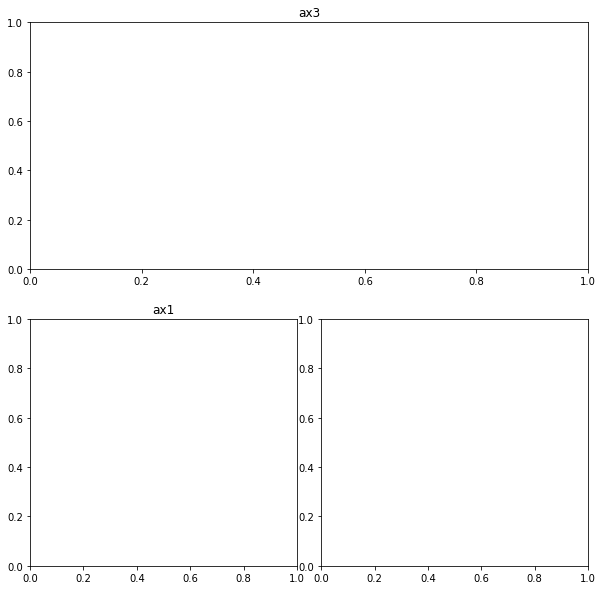

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax3 = plt.subplot2grid((2,4), (0,0),rowspan=1,colspan=4)
ax1 = plt.subplot2grid((2,4), (1,0),rowspan=1,colspan=2)
ax2 = plt.subplot2grid((2,4), (1,2),rowspan=1,colspan=2,sharex=ax1)
axarr = [ax1, ax2, ax3]
plt.show()